Emily Weed, Henry Li

INFO 1998 Final Project

Link to data set: https://www.kaggle.com/tomigelo/spotify-audio-features#SpotifyAudioFeaturesNov2018.csv

NOTE: From our original proposal, we have changed our question and how we intend to approach the problem. When we were attempting to predict the popularity of a song based on different subsets of features we were getting accuracy scores of ~.10 and lower. We decided to modify our question in order to attempt to get more meaningful results. We decided on attempting to classify songs into their respective artists based on features from the dataset. After changing our approach we were getting higher accuracy scores and decided to proceed with this as our new objective. Our write-up is located at the end of the file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')
df.head()
counts = df['artist_name'].value_counts().to_dict()

artists = []
for artist in counts:
    if(counts[artist] >= 200):
        artists.append(artist)
        
df = df[df.artist_name.isin(artists)]


In [2]:
df['artist_name'].value_counts()

Johann Sebastian Bach      3621
Wolfgang Amadeus Mozart    1755
Armin van Buuren           1124
Ludwig van Beethoven        928
Frédéric Chopin             614
Claude Debussy              451
Image Sounds                369
Waka Flocka Flame           273
Los Cadetes De Linares      266
Antonio Vivaldi             254
Duo Libano                  240
Binaural Beats Sleep        236
Above & Beyond              228
Name: artist_name, dtype: int64

In [3]:
print (len (df[df['artist_name'] == 'Johann Sebastian Bach']))

3621


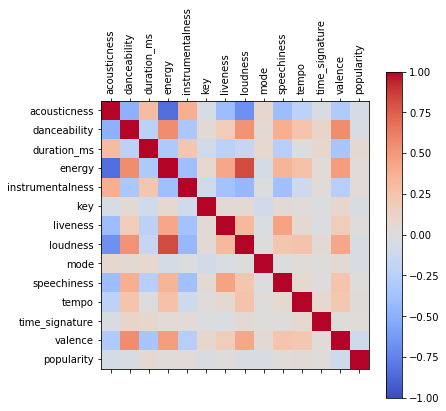

In [4]:
corr = df.corr()
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticks(range(len(corr.columns)))
plt.xticks(rotation=90)
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = df[['energy', 'tempo', 'speechiness', 'valence', 'instrumentalness']]
y = df[['artist_name']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)
model = KNeighborsClassifier(n_neighbors = 13)
model.fit(x_train, y_train)

knn_pred_train = model.predict(x_train)
knn_pred_test = model.predict(x_test)

print('Training Score: ' + str(accuracy_score(y_train, knn_pred_train)))
print('Testing Score: ' + str(accuracy_score(y_test, knn_pred_test)))

Training Score: 0.505116817918517
Testing Score: 0.42316602316602314


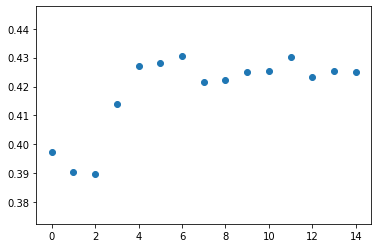

In [6]:
knn_scores = []
for i in range(1, 16):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    knn_scores.append(accuracy_score(y_test, model.predict(x_test)))

plt.scatter(list(range(15)), knn_scores)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = df[['energy', 'tempo', 'speechiness', 'valence', 'instrumentalness']]
y = df[['artist_name']]


model = DecisionTreeClassifier(max_depth = 7)
model.fit(x_train, y_train)

tree_pred_train = model.predict(x_train)
tree_pred_test = model.predict(x_test)

print('Training Score: ' + str (accuracy_score(y_train, tree_pred_train)))
print('Testing Score: '+ str (accuracy_score(y_test, tree_pred_test)))

Training Score: 0.5860204672716741
Testing Score: 0.5297297297297298


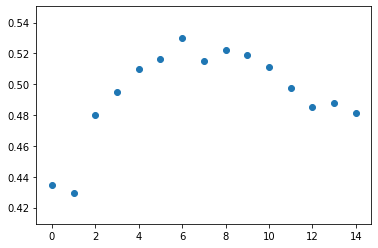

In [8]:
tree_scores = []
for i in range(1, 16):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(x_train, y_train)
    tree_scores.append(accuracy_score(y_test, model.predict(x_test)))
plt.scatter(list(range(15)), tree_scores)

In [9]:
y_test_counts = {}
y_test = y_test.reset_index()
for i in range(len(y_test)):
    if(y_test['artist_name'][i] in y_test_counts):
        y_test_counts[y_test['artist_name'][i]] += 1
    else:
        y_test_counts[y_test['artist_name'][i]] = 1

In [10]:
knn_accuracy = {}
knn_test = list(y_test['artist_name'])
for i in range(len(y_test)):
    if(knn_pred_test[i] == knn_test[i]):
        if(knn_test[i] in knn_accuracy):
            knn_accuracy[knn_test[i]] += 1
        else:
            knn_accuracy[knn_test[i]] = 1
    else:
        if(not knn_test[i] in knn_accuracy):
            knn_accuracy[knn_test[i]] = 0
for key in knn_accuracy:
    knn_accuracy[key] /= y_test_counts[key]

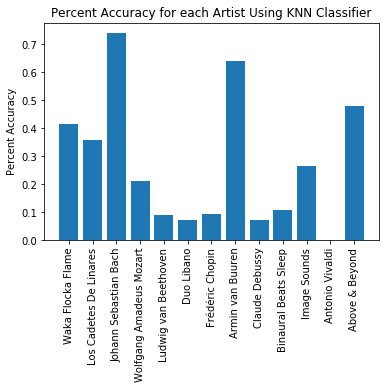

In [11]:
plt.bar(list(range(len(knn_accuracy))), knn_accuracy.values(), tick_label = list(knn_accuracy.keys()))
plt.xticks(size = 10, rotation = 'vertical')
plt.title('Percent Accuracy for each Artist Using KNN Classifier')
plt.ylabel('Percent Accuracy')
plt.show()

In [12]:
tree_accuracy = {}
tree_test = list(y_test['artist_name'])
for i in range(len(tree_test)):
    if(tree_pred_test[i] == tree_test[i]):
        if(tree_test[i] in tree_accuracy):
            tree_accuracy[tree_test[i]] += 1
        else:
            tree_accuracy[tree_test[i]] = 1
    else:
        if(not tree_test[i] in tree_accuracy):
            tree_accuracy[tree_test[i]] = 0
for key in tree_accuracy:
    tree_accuracy[key] /= y_test_counts[key]

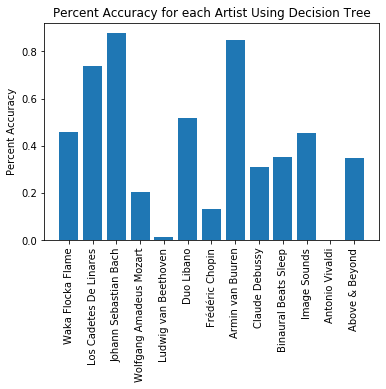

In [13]:
plt.bar(list(range(len(tree_accuracy))), tree_accuracy.values(), tick_label = list(tree_accuracy.keys()))
plt.xticks(size = 10, rotation = 'vertical')
plt.title('Percent Accuracy for each Artist Using Decision Tree')
plt.ylabel('Percent Accuracy')
plt.show()

The dataset that we are working with holds data for over 100,000 songs on Spotify. Each entry describes a song, including its artist in addition to several features including danceability, loudness, instrumentalness, etc. Our goal was to predict the artist of a song based on selected features of the song. We decided to limit the predictions to artists with at least 200 songs in the dataset to reduce the size of the dataset to a manageable size and improve the accuracy scores of our prediction models. By altering the dataset in this way, the number of entries was reduced to around 10,000 with 13 distinct artists.

We selected two machine learning algorithms to make our prediction models: KNNClassifier and Decision Tree. To determine the features for the predictions, we tested several features through trial and error and selected those that resulted in the highest accuracy scores. Furthermore, we generated a correlation matrix of the feautures to ensure that selected features were not correlated with each other. Finally, to determine the optimal number of neighbors and max depth of the KNNClassifier and Decision Tree respectively, we tested a variety of values and plotted each on a scatter plot. From there, we constructed each prediction model. For each model, we generated a bar plot for each model, displaying the percent accuracy for each of the individual artists.

Between the two algorithms, the test score was fairly similar, typically falling between 40% and 55% although we found that the Decision Tree usually resulted in a slightly higher score. After analyzing the individual accuracy scores of the artists, we noticed significant variance between the accuracy scores of the individual artists. For example, each model consistently predicted Johann Sebastian Bach well while predicting Antonio Vivaldi poorly. Although the reason is unclear, we noticed that artists with a greater number of songs typically had a greater accuracy score. An exception to this, however, is Beethoven who had a large number of songs in the dataset but was poorly predicted by each model. We hypothesize that this may be due to the nature of song features. Since Beethoven and Bach, for example, are both classical composers and thus write songs within the same genre, it is possible that many Beethoven songs were predicted to be written by another classical composer such as Bach.